# Importing Dataset and putting it into Pandas Dataset

In [1]:
import pandas as pd

path = './Data/imdbDataset.csv'
df = pd.read_csv(path)
#df = df.head(1000)

In [2]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


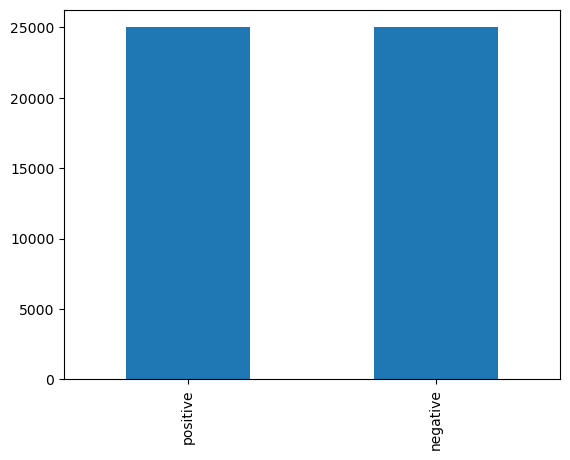

In [3]:
# Plotting a graph for the data.

import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

# Data Preprocessing
### Tokenization, Removing Stop Words, Normalization, Vectorization

In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from tqdm import tqdm

#nltk.download('stopwords')

stemmer = PorterStemmer()

# List of all the stop words, we will remove.
all_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those']

In [5]:
corpus = []
pos_corpus = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    sent = re.sub('[^a-zA-Z]', ' ', row['review']) #Dropping Special Charecters
    sent = sent.lower()  #Case Normalization
    sent = word_tokenize(sent) #Tokenization
    sent = [word for word in sent if word not in all_stopwords] #Removing Stopwords
    sent = [stemmer.stem(word) for word in sent] #Stemming 
    #pos_sent = pos_tag(sent) #Adding POS Tag
    #pos_corpus.append(pos_sent)
    sent = ' '.join(sent)
    corpus.append(sent)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [33:14<00:00, 25.06it/s]


# Data Transformation
### Converting Dataset into vector form

In [6]:
import spacy #Used for vectorization
nlp = spacy.load("en_core_web_md")

In [7]:
X = []
for sent in tqdm(corpus, total = len(corpus)):
    doc = nlp(sent)
    vector = doc.vector
    X.append(vector)
y = df.iloc[:, -1].values

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [3:06:26<00:00,  4.47it/s]


# Dividing Datasets into training and testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model fitting 
### Naive Bayes

In [9]:
from sklearn.naive_bayes import c
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, './Classifier_Sentiment_Model') 

['./Classifier_Sentiment_Model']

# Evaluating Model Performance

In [11]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[3434 1601]
 [1872 3093]]


0.6527